In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
from lib.vis import plot_session_intervals
from lib.course import LECTURES, ASSIGNMENTS, IDX_TO_LECTURE, IDX_TO_ASSIGNMENT
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date
import datetime as dt
import pandas as pd
import seaborn as sns

In [3]:
lecture = LECTURES[4]
df = lecture.viewing_data()
vd = pd.concat([l.viewing_data() for l in LECTURES])


In [129]:
def day_to_string(day):
    print(day)
    days = ["M", "Tu", "W", "Th", "F", "Sat", "Sun"]
    return days[day]

In [140]:
def plot_lectures(df,
                  ax,
                  minimum_mins=10,
                  course_start=dt.datetime(2019, 9, 20),
                  course_end=dt.datetime(2019, 12, 15)):
    counts = []
    start_date = course_start
    end_date = course_end
    daterange = pd.date_range(start_date, end_date)
    
    for date in daterange:
        unique_users = df[df['time'].dt.date == date].groupby("user")
        exceeding_minimum_mins = unique_users.sum()["minutes"] > minimum_mins
        counts.append([date, exceeding_minimum_mins.shape[0]])
    
    ax.bar(np.array(counts)[:, 0], np.array(counts)[:, 1], alpha=0.3)
    plt.draw()
    labels = [item.get_text() + " (" + day_to_string(dt.datetime.strptime(item.get_text(),'%Y-%m-%d').weekday()) + ")" for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels)

    print(labels)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel('Number of students watching > 10 min of any lecture')
    ax.set_title('Lecture viewing per day')

In [141]:
def plot_assignment(vd, ax, assignment_index):
    assignment = IDX_TO_ASSIGNMENT[int(assignment_index)]
    lectures = assignment.lectures
    count = 0
    fig = ax.figure
    fig.clf()
    fig.set_size_inches(15, 5)

    axs = fig.subplots(len(lectures),
                       1,
                       squeeze=False,
                       sharex=True,
                       sharey=True)

    fig.suptitle(
        f'Lecture viewing habits relative to deadline for "{assignment.name}"')
    for lecture in lectures:
        df = vd[vd.lecture == lecture]
        plot_lectures(df, axs[count, 0])
        axs[count, 0].axvline(x=assignment.duedate)
        axs[count, 0].grid(True)
        axs[count, 0].set_ylabel('')
        axs[count, 0].set_title(
            f'Lecture {lecture}: {IDX_TO_LECTURE[lecture].name}')
        count += 1

[]
1
1
4
4
6
6
['2019-10-01 (Tu)', '2019-10-15 (Tu)', '2019-11-01 (F)', '2019-11-15 (F)', '2019-12-01 (Sun)', '2019-12-15 (Sun)']


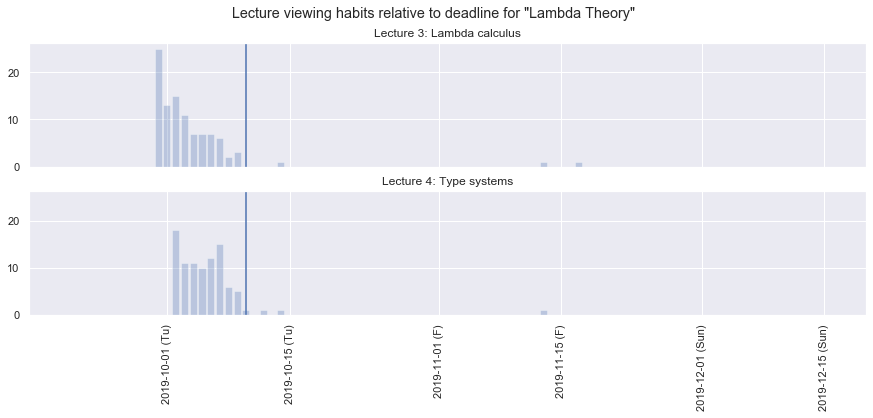

In [143]:
fig, ax = plt.subplots()

plot_assignment(vd, ax,2)